In [1]:
%matplotlib inline
%matplotlib notebook 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import cartopy
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
fname = '~/WORK_201909_GOLD_TIEGCM/GOLD_data/level2/gold_l2_on2_2018_303_v02_r01_c01.nc'data_xr = xr.open_dataset(fname)

In [3]:
data_xr

<xarray.Dataset>
Dimensions:             (nlats: 104, nlons: 92, nmask: 4001, nscans: 68)
Dimensions without coordinates: nlats, nlons, nmask, nscans
Data variables:
    mask_oi_1356        (nmask) int32 ...
    n2_lbh_unc_ran      (nscans, nlats, nlons) float32 ...
    lookup_table        (nscans) |S50 ...
    mask_wavelength     (nmask) float32 ...
    radiance_oi_1356    (nscans, nlats, nlons) float32 ...
    channel             (nscans) |S50 ...
    latitude            (nlats, nlons) float32 ...
    on2                 (nscans, nlats, nlons) float32 ...
    oi_1356_unc_ran     (nscans, nlats, nlons) float32 ...
    on2_unc_ran         (nscans, nlats, nlons) float32 ...
    dqi                 (nscans) int32 ...
    scan_start_time     (nscans) |S50 ...
    solar_zenith_angle  (nscans, nlats, nlons) float32 ...
    longitude           (nlats, nlons) float32 ...
    on2_dqi             (nscans, nlats, nlons) int32 ...
    on2_unc_sys         (nscans, nlats, nlons) float32 ...
    on2_unc_mod         (nscans, nlats, nlons) float32 ...
    n2_lbh_unc_sys      (nscans, nlats, nlons) float32 ...
    time_utc            (nscans, nlats, nlons) |S50 ...
    mask_n2_lbh         (nmask) int32 ...
    input_l1c_file      (nscans) |S50 ...
    radiance_n2_lbh     (nscans, nlats, nlons) float32 ...
    emission_angle      (nscans, nlats, nlons) float32 ...
    scan_stop_time      (nscans) |S50 ...
    oi_1356_unc_sys     (nscans, nlats, nlons) float32 ...
    hemisphere          (nscans) |S50 ...
Attributes:
    Data_revision:               01
    Logical_source:              GOLD_L2_ON2
    PI_name:                     Richard Eastes
    TEXT:                        The GOLD mission of opportunity flies an ult...
    Mission_group:               GOLD
    Data_version:                02
    Data_type:                   APIDx? > GOLD Application ID 0x?: Level 2 Da...
    Generation_date:             20190808
    date_start:                  2018-10-30T06:10:31Z
    dqi:                         0
    Instrument_type:             UV Imaging Spectrograph (Space)
    PI_affiliation:              University of Colorado/LASP
    Source_name:                 GOLD>Global-scale Observations of the Limb a...
    Data_cycle:                  01
    Acknowledgement:             This is a data product from the NASA Global-...
    Logical_source_description:  GOLD ON2 L2 Daily File
    Discipline:                  Space Physics > Ionospheric Science
    Logical_file_id:             GOLD_L2_ON2_2018_303_v02_r01_c01
    date_end:                    2018-10-30T23:03:45Z
    Descriptor:                  ON2>Column density ratio of atomic oxygen to...
    Project:                     NASA > GOLD
    Software_version:            f5220e6

<IPython.core.display.Javascript object>


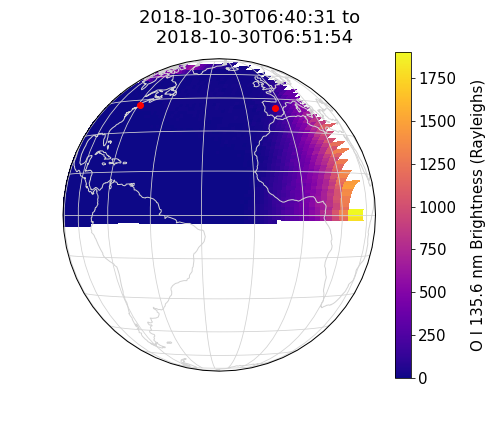

In [18]:
#plot a scan

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


'''Chose scan number 2 of the day'''
scan_num=2

'''Setup the format if needed'''
plt.rcParams.update({
    "font.size": 20,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.labelpad']=15

'''Setup the size of the figure'''
fig= plt.figure(figsize=(7,6))

'''Title'''
fig.suptitle('%s to \n %s' % (str(data_xr.scan_start_time[scan_num].values)[2:-2],str(data_xr.scan_stop_time[scan_num].values)[2:-2]),color='black')

'''Setup the projection of your plot, I use 'geostationary' as a example, you can also try NearsidePerspective if you want to focus on other latitue '''
# Nearside_ax=ccrs.NearsidePerspective(
#                             central_latitude=10.,
#                             central_longitude=-50.,
#                             satellite_height=35785831)
geostationary_ax = ccrs.Geostationary(central_longitude=-30, satellite_height=65785831)


'''Select the data you like to plot'''
r1356 = data_xr['radiance_oi_1356'][scan_num, :, :]
lats = data_xr['latitude']
lons = data_xr['longitude']

'''Simply using pcolor with a proper projection, you can make the plot with data on the globe.'transform=ccrs.PlateCarree()' place the data on accordingly in a geographic longitude vs. latitude coordinate'''
ax=plt.subplot(projection=geostationary_ax)
im=ax.pcolor(lons, lats, r1356, transform=ccrs.PlateCarree(),cmap='plasma')#,edgecolor='black')#,vmax=1.5,vmin=0.5)


'''As an example, I marked Boston and Madrid in the map using thier lon and lat '''
Boston_lon=360-71.0589
Boston_lat=42.3601
Madrid_lon=360-3.7038
Madrid_lat=40.4168
ax.plot([Boston_lon,Madrid_lon],[Boston_lat,Madrid_lat],'ro',transform=ccrs.PlateCarree())

'''Creat a color bar'''
cb=plt.colorbar(im)
cb.set_label('O I 135.6 nm Brightness (Rayleighs)')

ax.set_global()
ax.add_feature(cartopy.feature.OCEAN,color='white')
ax.add_feature(cartopy.feature.LAND,color='white')
ax.coastlines(color='lightgrey',linewidth=1)
ax.gridlines(color='lightgrey')

#'''If you want to save the plot'''
# plt.savefig('plot location')
# plt.show()
